![somimage](https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcStCGq9GejI7MAnHYvG0mfetdvBTN5v3DEQLg&usqp=CAU)

### Importing the libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing the dataset

In [3]:
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values

In [4]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [6]:
dataset.shape

(690, 16)

## Feature Scaling


In [7]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
X = sc.fit_transform(X)

##To install minisom
!pip install minisom

##Training the SOM


In [9]:
from minisom import MiniSom
som=MiniSom(12,12,15,sigma=1.0,learning_rate=0.5)
som.random_weights_init(X)
som.train_random(X,num_iteration=100)

##Visualizing the results


#### To visualize result we will use MID(mean internode distance).Higher be the MID far is the node far from his neighbours more likely to be an outlier we use color to specify MID.The larger be the MID the color gets close to white

In [11]:
from pylab import pcolor,colorbar,plot,show,bone

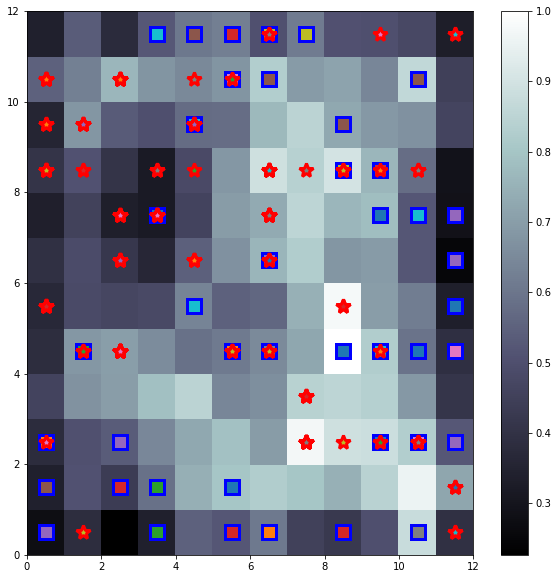

In [24]:
plt.figure(figsize=(10,10))
bone()
pcolor(som.distance_map().T)## To calcuate MID
colorbar()
# we create marker
# red circle who didn't get approval and blue square who  got approval
markers=["*","s"]
colors=["r","b"]
#we will create a loop which iterates through the customers for each customer we will mark the winning node depending the customer get approval or not this winning node will be colored
for i,x in enumerate(X):
    win_node=som.winner(x)
    plot(win_node[0]+0.5,win_node[1]+0.5,markers[y[i]],markeredgecolor=colors[y[i]],markerfacecolor=None,markeredgewidth=3,markersize=14)

### Here the node with color close to white are potential frauds

In [25]:
mappings=som.win_map(X)

In [55]:
frauds=np.concatenate((mappings[(10,0)],mappings[(10,2)],mappings[(8,4)],mappings[(10,10)],mappings[(6,10)],mappings[(5,1)],mappings[(1,4)],mappings[(9,7)],mappings[(8,8)],mappings[(9,8)],mappings[(9,2)]),axis=0)

In [68]:
ids=[]
for i in sc.inverse_transform(frauds)[:,0]:
    print(dataset.loc[dataset["CustomerID"]==i])
    print("-----------------------------------")
    ids.append(dataset.loc[dataset["CustomerID"]==i,"CustomerID"].values)

    CustomerID  A1    A2   A3  A4  A5  A6   A7  A8  A9  A10  A11  A12  A13  \
64    15766183   0  24.5  0.5   2  11   8  1.5   1   0    0    0    2  280   

    A14  Class  
64  825      1  
-----------------------------------
     CustomerID  A1     A2   A3  A4  A5  A6   A7  A8  A9  A10  A11  A12  A13  \
170    15684722   0  27.67  1.5   2   7   4  2.0   1   0    0    0    1  368   

     A14  Class  
170    1      0  
-----------------------------------
     CustomerID  A1     A2    A3  A4  A5  A6   A7  A8  A9  A10  A11  A12  A13  \
240    15772329   0  28.08  15.0   1  10   9  0.0   1   0    0    0    2    0   

       A14  Class  
240  13213      1  
-----------------------------------
     CustomerID  A1     A2    A3  A4  A5  A6    A7  A8  A9  A10  A11  A12  \
254    15734649   0  40.83  10.0   2  11   8  1.75   1   0    0    0    2   

     A13  A14  Class  
254   29  838      1  
-----------------------------------
     CustomerID  A1     A2     A3  A4  A5  A6   A7  A8  A9  A10 

446    0  3001      1  
-----------------------------------
     CustomerID  A1    A2    A3  A4  A5  A6    A7  A8  A9  A10  A11  A12  A13  \
481    15812766   1  21.5  9.75   2   8   4  0.25   1   0    0    0    2  140   

     A14  Class  
481    1      0  
-----------------------------------
     CustomerID  A1     A2     A3  A4  A5  A6    A7  A8  A9  A10  A11  A12  \
484    15784526   1  42.83  4.625   2  11   4  4.58   1   0    0    0    1   

     A13  A14  Class  
484    0    1      1  
-----------------------------------
     CustomerID  A1     A2    A3  A4  A5  A6    A7  A8  A9  A10  A11  A12  \
496    15589541   1  25.75  0.75   2   8   5  0.25   1   0    0    0    2   

     A13  A14  Class  
496  349   24      1  
-----------------------------------
     CustomerID  A1     A2   A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
557    15757306   1  23.33  1.5   2   8   8  1.415   1   0    0    0    2   

     A13  A14  Class  
557  422  201      1  
----------------------------

     CustomerID  A1     A2     A3  A4  A5  A6    A7  A8  A9  A10  A11  A12  \
188    15662152   0  29.75  0.665   2   9   4  0.25   0   0    0    1    2   

     A13  A14  Class  
188  300    1      0  
-----------------------------------
     CustomerID  A1     A2     A3  A4  A5  A6    A7  A8  A9  A10  A11  A12  \
262    15734578   0  21.75  11.75   2   8   4  0.25   0   0    0    1    2   

     A13  A14  Class  
262  180    1      0  
-----------------------------------
     CustomerID  A1     A2   A3  A4  A5  A6     A7  A8  A9  A10  A11  A12  \
327    15570508   0  51.92  6.5   2   3   5  3.085   0   0    0    1    2   

     A13  A14  Class  
327   73    1      0  
-----------------------------------
     CustomerID  A1     A2     A3  A4  A5  A6   A7  A8  A9  A10  A11  A12  \
365    15641733   0  50.25  0.835   2   6   4  0.5   0   0    0    1    2   

     A13  A14  Class  
365  240  118      0  
-----------------------------------
     CustomerID  A1     A2   A3  A4  A5  A6   A7

## Finding the frauds


##Printing the Fraunch Clients

In [80]:
customers_fraud=dataset[dataset.CustomerID.isin(ids.flatten())]

In [83]:
customers_fraud.Class

0      0
1      0
20     0
32     0
36     1
      ..
671    1
677    0
682    1
685    1
687    1
Name: Class, Length: 99, dtype: int64

In [19]:
## This vector will assign a code book vector(i.e a weight of BMU to each data point)
som.quantization(data)

array([[0.3090394 , 0.61183181, 0.74063874],
       [0.17135028, 0.3526552 , 0.78711018],
       [0.77894028, 0.20029293, 0.53569189],
       [0.79544392, 0.77852448, 0.69892505],
       [0.7648682 , 0.83713145, 0.13360056],
       [0.17698875, 0.29263051, 0.60729175],
       [0.42839315, 0.28278238, 0.23001543],
       [0.6732647 , 0.6168658 , 0.13364586],
       [0.20895833, 0.18978631, 0.16773248],
       [0.86855088, 0.31445983, 0.81124909],
       [0.77894028, 0.20029293, 0.53569189],
       [0.68154399, 0.81609936, 0.65359823],
       [0.89402169, 0.51037567, 0.49113637],
       [0.6732647 , 0.6168658 , 0.13364586],
       [0.19001615, 0.59355147, 0.76097725],
       [0.41792879, 0.77979459, 0.86166312],
       [0.42925101, 0.80751215, 0.31005187],
       [0.42839315, 0.28278238, 0.23001543],
       [0.69946943, 0.23807352, 0.39975446],
       [0.83194454, 0.87819045, 0.08155599],
       [0.6732647 , 0.6168658 , 0.13364586],
       [0.20895833, 0.18978631, 0.16773248],
       [0.

In [20]:
# It is the average of distance between each input and its BMU 
som.quantization_error(data)

0.11846434816033295

In [31]:
net.shape

(7, 7, 3)

In [32]:
import matplotlib.pyplot as plt

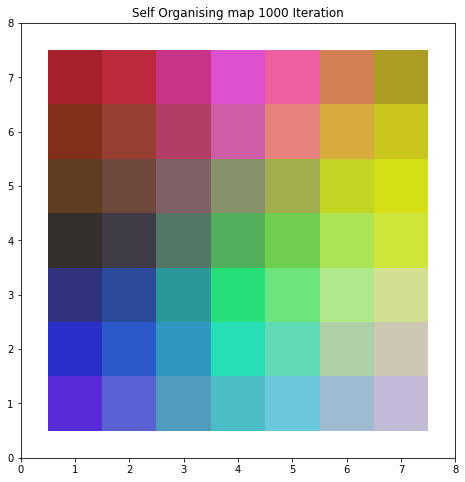

In [36]:
from matplotlib import patches
fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(111,aspect="equal")
ax.set_xlim((0,net.shape[0]+1))
ax.set_ylim((0,net.shape[1]+1))
ax.set_title("Self Organising map 1000 Iteration")
for x in range(1,net.shape[0]+1):
    for y in range(1,net.shape[1]+1):
        ax.add_patch(patches.Rectangle((x-0.5,y-0.5),1,1,facecolor=net[x-1,y-1,:],edgecolor="None"))
plt.show()

In [ ]:
# As you can see similar color have been clustered together

In [43]:
som.distance_map()

array([[0.25618517, 0.4303379 , 0.50119997, 0.50656637, 0.3281523 ,
        0.3441321 , 0.15497103],
       [0.45397802, 0.75383017, 0.865077  , 0.80979328, 0.64714014,
        0.65038554, 0.3971628 ],
       [0.42311589, 0.76738481, 0.93358917, 0.84660759, 0.82238702,
        0.86237078, 0.51913002],
       [0.31533857, 0.8559958 , 1.        , 0.81905289, 0.88043907,
        0.89764397, 0.57581481],
       [0.454697  , 0.7992618 , 0.84786716, 0.84090392, 0.8795648 ,
        0.96247456, 0.51935149],
       [0.40960878, 0.70740028, 0.79046968, 0.74098407, 0.70953079,
        0.79071473, 0.51141447],
       [0.19487926, 0.34422079, 0.42524161, 0.42005621, 0.34813174,
        0.34725802, 0.25892914]])

In [48]:
som.labels_map(data,a)

defaultdict(list,
            {(2, 0): Counter({'Mali': 1, 'Kali': 2}),
             (1, 1): Counter({'Sali': 2, 'Mali': 2}),
             (2, 6): Counter({'Mali': 1, 'Kali': 1, 'Sali': 1}),
             (6, 1): Counter({'Kali': 2, 'Sali': 1}),
             (5, 4): Counter({'Sali': 2}),
             (1, 2): Counter({'Kali': 1, 'Sali': 1}),
             (1, 4): Counter({'Sali': 1, 'Kali': 1}),
             (6, 6): Counter({'Mali': 1, 'Kali': 3}),
             (0, 3): Counter({'Mali': 2, 'Sali': 1, 'Kali': 1}),
             (3, 6): Counter({'Kali': 3, 'Mali': 2, 'Sali': 1}),
             (5, 1): Counter({'Kali': 1}),
             (4, 5): Counter({'Sali': 1}),
             (2, 1): Counter({'Kali': 1}),
             (4, 0): Counter({'Sali': 2, 'Mali': 1}),
             (4, 3): Counter({'Sali': 1}),
             (2, 5): Counter({'Mali': 1}),
             (6, 4): Counter({'Kali': 1, 'Sali': 2, 'Mali': 1}),
             (1, 5): Counter({'Kali': 2, 'Mali': 1, 'Sali': 1}),
             (3, 3): 

In [47]:
 a=[]
for i in np.random.randint(0,3,100):
    if i==0:
      a.append("Kali")
    elif i==1:
        a.append("Mali")
    else:
        a.append("Sali")